# Labotatorio 3
El presente documento tiene la finalidad de generar un análisis exploratorio de los datos `EDA`, además de hacer un análisis descriptivo e inferencial.
La data a trabajar es  **<p style="color: blue;"> Data_Nutricion_grupos.xlsx</p>**

## Ejercicio N°1
- Análisis Exploratorio de datos (EDA) 
- Estadística Descriptiva. Incluir la generación de nuevas variables de valor.


In [89]:
# Importanto librerías
import pandas as pd 
import numpy as np

# Importando archivos
df = open('C:/Users/osval/Documents/_INACAP/_Capacitaciones/Curso_R_inacap/_Ciencia de Datos/Python in Data Science/Tareas/Proyecto 3/Data_Nutricion_grupos.csv')
df = pd.read_csv(df, delimiter = ",")


#Visualizando la data
df.head(3)


Individuo  talla  edad peso_kg circun_cuello    IMC circun_cintura cadera  \
0  Persona 1  155,7  16.0    71,2          35,7  29,58             90     98   
1  Persona 2  166,5  16.0      61          31,8  22,36           80,9  100,5   
2  Persona 3  151,3  16.0    49,1          30,5  21,62             72     86   

  ind_cintura_cadera ind_cintura_estatura por_grasa_corporal  \
0               0,92                 0,58              36,45   
1               0,80                 0,49              28,79   
2               0,84                 0,48              29,87   

  masa_corporal_magra_kg pliegue_cutaneo_BICEPS pliegue_cutaneo_TRICEPS  \
0                  45,25                     13                      27   
1                  43,44                      5                      19   
2                  34,44                     13                      18   

  pliegue_cutaneo_ESCAPULAR pliegue_cutaneo_SUPRAILIACO Grupos  
0                        32                          34      A  
1                        15                          22      A  
2                        18                          17      A

### Solución
Lo primero que se verá es el cómo está constituida la base de datos.

In [90]:
df.dtypes

Individuo                       object
talla                           object
edad                           float64
peso_kg                         object
circun_cuello                   object
IMC                             object
circun_cintura                  object
cadera                          object
ind_cintura_cadera              object
ind_cintura_estatura            object
por_grasa_corporal              object
masa_corporal_magra_kg          object
pliegue_cutaneo_BICEPS          object
pliegue_cutaneo_TRICEPS         object
pliegue_cutaneo_ESCAPULAR       object
pliegue_cutaneo_SUPRAILIACO     object
Grupos                          object
dtype: object

In [91]:
print("La cantidad de registros totales es:", df.size, " y la dimensión del Dataframe es:", df.shape)

La cantidad de registros totales es: 11084  y la dimensión del Dataframe es: (652, 17)


In [92]:
print("Por otro lado, la cantidad final de datos faltantes es:",df.isnull().sum().sum(),
      " desglozándese en los siguientes campos")
df.isnull().sum()

Por otro lado, la cantidad final de datos faltantes es: 154  desglozándese en los siguientes campos


Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
dtype: int64

In [93]:
print("Representando el ", round(df.isnull().sum().sum()/df.size,4)*100,"% del total de datos")

Representando el  1.39 % del total de datos


Ya  con esta información se comenzará a dar una estrutura más confiable al DataFrame, por lo cual se realizarán las siguientes transformaciones:
- Convertir las columnas con tipo `object` a `float64`
- Si bien la cantidad de registro faltantes es cercana al 1%, se toma la decisión de imputar los datos solo por motivos pedagógicos.
- Eliminar los registros duplicados

#### Convertir registros a float64
Las columnas a transformar son: 

In [94]:
df.columns

Index(['Individuo', 'talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC',
       'circun_cintura', 'cadera', 'ind_cintura_cadera',
       'ind_cintura_estatura', 'por_grasa_corporal', 'masa_corporal_magra_kg',
       'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS',
       'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO', 'Grupos'],
      dtype='object')

In [95]:
# Listamos las columnas que queremos transformar
columnas_a_transformar = ['talla','peso_kg', 'circun_cuello', 'IMC', 'circun_cintura', 'cadera', 
                          'ind_cintura_cadera', 'ind_cintura_estatura', 'por_grasa_corporal', 
                          'masa_corporal_magra_kg', 'pliegue_cutaneo_BICEPS', 
                          'pliegue_cutaneo_TRICEPS', 'pliegue_cutaneo_ESCAPULAR', 
                          'pliegue_cutaneo_SUPRAILIACO']

# Reemplazamos comas por puntos y convertimos las columnas
for columna in columnas_a_transformar:
    df[columna] = df[columna].str.replace(',', '.').astype(float)

# Confirmamos que las columnas ahora son float64
df.dtypes

Individuo                       object
talla                          float64
edad                           float64
peso_kg                        float64
circun_cuello                  float64
IMC                            float64
circun_cintura                 float64
cadera                         float64
ind_cintura_cadera             float64
ind_cintura_estatura           float64
por_grasa_corporal             float64
masa_corporal_magra_kg         float64
pliegue_cutaneo_BICEPS         float64
pliegue_cutaneo_TRICEPS        float64
pliegue_cutaneo_ESCAPULAR      float64
pliegue_cutaneo_SUPRAILIACO    float64
Grupos                          object
dtype: object

In [96]:
df.head(3)

Individuo  talla  edad  peso_kg  circun_cuello    IMC  circun_cintura  \
0  Persona 1  155.7  16.0     71.2           35.7  29.58            90.0   
1  Persona 2  166.5  16.0     61.0           31.8  22.36            80.9   
2  Persona 3  151.3  16.0     49.1           30.5  21.62            72.0   

   cadera  ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0    98.0                0.92                  0.58               36.45   
1   100.5                0.80                  0.49               28.79   
2    86.0                0.84                  0.48               29.87   

   masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  pliegue_cutaneo_TRICEPS  \
0                   45.25                    13.0                     27.0   
1                   43.44                     5.0                     19.0   
2                   34.44                    13.0                     18.0   

   pliegue_cutaneo_ESCAPULAR  pliegue_cutaneo_SUPRAILIACO Grupos  
0                       32.0                         34.0      A  
1                       15.0                         22.0      A  
2                       18.0                         17.0      A

**Nota** Hay que tener presente que la función `str.replace` sólo genera reemplazos en las columnas definidas como *object* o *string*, así que hay que verificar antes que los campos a reemplazar presenten estas condiciones. En el caso de arriba se eliminó de las columnas que requerían reemplazo al campo `èdad`. Esto se debe a que el campo mencionado presentaba un tipo `float64`. 

#### Imputación de datos
**Nota:** Se incorpora el campo `edad` debido a que esta variable presenta campos que requieren imputarse.

In [98]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Crear un imputador iterativo (MICE)
imputer = IterativeImputer(max_iter=10, random_state=0)

columnas_a_transformar = ['talla', 'edad','peso_kg', 'circun_cuello', 'IMC', 'circun_cintura', 'cadera', 
                          'ind_cintura_cadera', 'ind_cintura_estatura', 'por_grasa_corporal', 
                          'masa_corporal_magra_kg', 'pliegue_cutaneo_BICEPS', 
                          'pliegue_cutaneo_TRICEPS', 'pliegue_cutaneo_ESCAPULAR', 
                          'pliegue_cutaneo_SUPRAILIACO']

# Seleccionar las columnas relevantes para la imputación
columnas_para_imputar = columnas_a_transformar

# Aplicar la imputación múltiple
df_imputado = pd.DataFrame(imputer.fit_transform(df[columnas_para_imputar]), columns=columnas_para_imputar)

# Restaurar las columnas originales no imputadas
df[columnas_para_imputar] = df_imputado

df.head(3)

Individuo  talla  edad  peso_kg  circun_cuello    IMC  circun_cintura  \
0  Persona 1  155.7  16.0     71.2           35.7  29.58            90.0   
1  Persona 2  166.5  16.0     61.0           31.8  22.36            80.9   
2  Persona 3  151.3  16.0     49.1           30.5  21.62            72.0   

   cadera  ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0    98.0                0.92                  0.58               36.45   
1   100.5                0.80                  0.49               28.79   
2    86.0                0.84                  0.48               29.87   

   masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  pliegue_cutaneo_TRICEPS  \
0                   45.25                    13.0                     27.0   
1                   43.44                     5.0                     19.0   
2                   34.44                    13.0                     18.0   

   pliegue_cutaneo_ESCAPULAR  pliegue_cutaneo_SUPRAILIACO Grupos  
0                       32.0                         34.0      A  
1                       15.0                         22.0      A  
2                       18.0                         17.0      A

In [99]:
df.isnull().sum()

Individuo                      0
talla                          0
edad                           0
peso_kg                        0
circun_cuello                  0
IMC                            0
circun_cintura                 0
cadera                         0
ind_cintura_cadera             0
ind_cintura_estatura           0
por_grasa_corporal             0
masa_corporal_magra_kg         0
pliegue_cutaneo_BICEPS         0
pliegue_cutaneo_TRICEPS        0
pliegue_cutaneo_ESCAPULAR      0
pliegue_cutaneo_SUPRAILIACO    0
Grupos                         0
dtype: int64

Una vez que los datos han sido imputados, se procederá a verificar si existen datos duplicados y de ser así, se eliminarán esos registros.
#### Datos duplicados

In [100]:
# Verificamos los duplicados
df[df["Individuo"].duplicated()].head()
#No se aprecian datos repetidos para el campo "Individuo"


Empty DataFrame
Columns: [Individuo, talla, edad, peso_kg, circun_cuello, IMC, circun_cintura, cadera, ind_cintura_cadera, ind_cintura_estatura, por_grasa_corporal, masa_corporal_magra_kg, pliegue_cutaneo_BICEPS, pliegue_cutaneo_TRICEPS, pliegue_cutaneo_ESCAPULAR, pliegue_cutaneo_SUPRAILIACO, Grupos]
Index: []

Con lo anterior, no se aprecian campos duplicados.

#### Análisis descriptivo
A continuación, se realizará un análisis exploratorio a los datos y se utilizarán gráficas para comprender las distribuciones de los datos en algunas variables. Buscar su dispersión, correlación entre las variables y aplicar algunos test estadísticos a las variables.

##### Mapa de calor para correlaciones

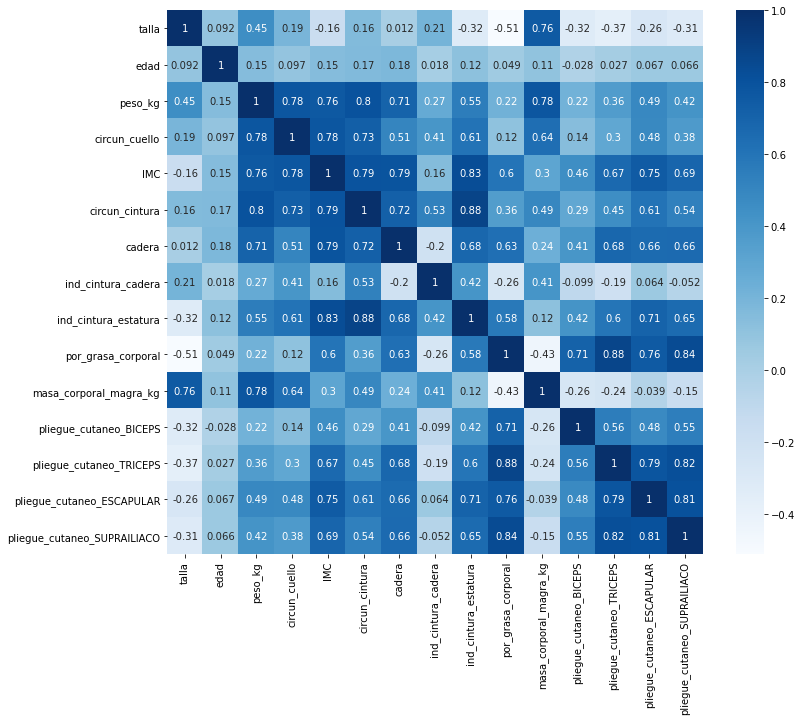

In [101]:
def mapa_calor (x):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Configurar el tamaño de la figura
    plt.figure(figsize=(12, 10))  # Cambia los valores (12, 10) por el tamaño que prefieras
    

    """
    
    """
    sns.heatmap(x,
    xticklabels = x.columns.values,
    yticklabels = x.columns.values,
    annot = True,
    cmap = "Blues" # viridis, Blues
    );

mapa_calor(df.corr())

##### Análisis estadístico descriptivo
Se generará una copia de la base de datos para poder trabajar únicamente con los campos que contienen números y así realizar el análisis estadístico.

In [146]:
df2 = df.copy() #copia de la base de datos df
df2=df2.iloc[:, 2:16]
df2.head(3)

edad  peso_kg  circun_cuello    IMC  circun_cintura  cadera  \
0  16.0     71.2           35.7  29.58            90.0    98.0   
1  16.0     61.0           31.8  22.36            80.9   100.5   
2  16.0     49.1           30.5  21.62            72.0    86.0   

   ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0                0.92                  0.58               36.45   
1                0.80                  0.49               28.79   
2                0.84                  0.48               29.87   

   masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  pliegue_cutaneo_TRICEPS  \
0                   45.25                    13.0                     27.0   
1                   43.44                     5.0                     19.0   
2                   34.44                    13.0                     18.0   

   pliegue_cutaneo_ESCAPULAR  pliegue_cutaneo_SUPRAILIACO  
0                       32.0                         34.0  
1                       15.0                         22.0  
2                       18.0                         17.0

In [147]:
estadistica=pd.DataFrame()
estadistica['Minimo'] = round(df2.min(),2)
estadistica['Promedio'] = round(df2.mean(),2)
estadistica['Maximo'] = round(df2.max(),2)
estadistica['std'] = round(df2.std(),2)
estadistica['cv'] = round(df2.std()/df2.mean()*100,2)
estadistica['Percentil 25'] = round(df2.quantile(0.25),2)
estadistica['Mediana'] = round(df2.median(),2)
estadistica['Percentil 75'] = round(df2.quantile(0.75),2)
estadistica


Minimo  Promedio  Maximo   std     cv  \
edad                           0.00     14.75   17.00  1.05   7.11   
peso_kg                       33.90     56.91   91.10  8.52  14.98   
circun_cuello                 24.50     32.15   39.20  2.14   6.67   
IMC                           14.54     22.41   36.71  3.04  13.55   
circun_cintura                55.00     74.62  107.50  6.98   9.35   
cadera                        69.80     89.88  120.80  7.21   8.02   
ind_cintura_cadera             0.65      0.83    1.03  0.05   6.58   
ind_cintura_estatura           0.36      0.47    0.70  0.05   9.85   
por_grasa_corporal             4.21     23.52   39.45  7.86  33.43   
masa_corporal_magra_kg        28.50     43.39   71.57  6.96  16.03   
pliegue_cutaneo_BICEPS         2.00      9.18   90.00  5.66  61.66   
pliegue_cutaneo_TRICEPS        5.00     15.65   39.00  5.69  36.38   
pliegue_cutaneo_ESCAPULAR      5.00     14.38   35.00  5.31  36.90   
pliegue_cutaneo_SUPRAILIACO    3.00     14.68   35.00  5.95  40.56   

                             Percentil 25  Mediana  Percentil 75  
edad                                14.00    15.00         15.00  
peso_kg                             51.00    55.80         61.70  
circun_cuello                       30.70    32.00         33.50  
IMC                                 20.28    22.12         23.90  
circun_cintura                      70.00    73.80         78.00  
cadera                              85.00    89.00         94.00  
ind_cintura_cadera                   0.79     0.83          0.87  
ind_cintura_estatura                 0.44     0.46          0.49  
por_grasa_corporal                  15.89    26.09         30.07  
masa_corporal_magra_kg              38.15    42.36         48.12  
pliegue_cutaneo_BICEPS               5.00     8.00         12.00  
pliegue_cutaneo_TRICEPS             11.00    16.00         19.00  
pliegue_cutaneo_ESCAPULAR           10.00    14.00         18.00  
pliegue_cutaneo_SUPRAILIACO         10.00    15.00         19.00

##### Gráfico de funciones

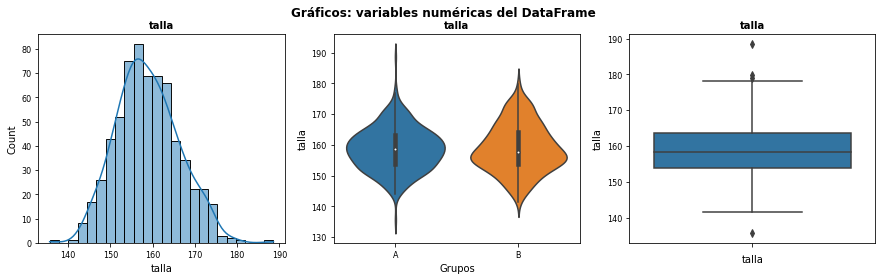

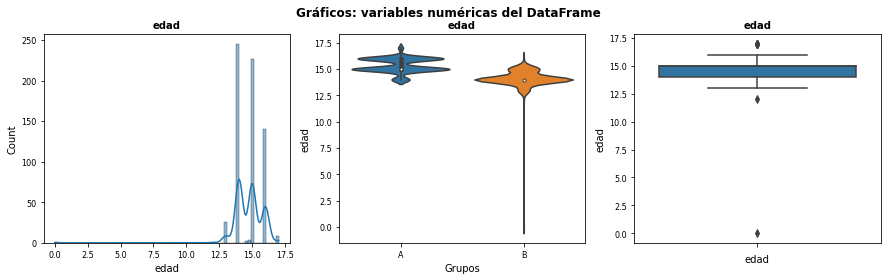

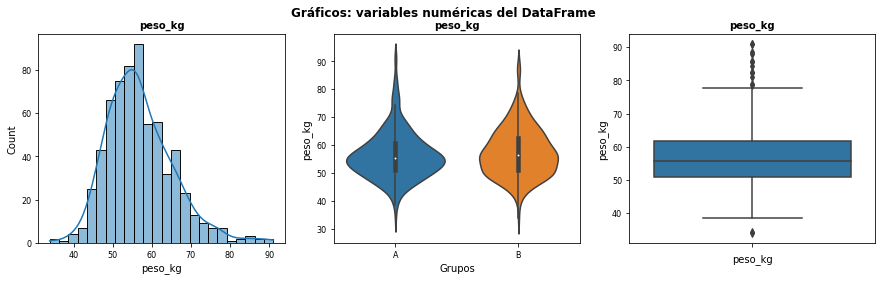

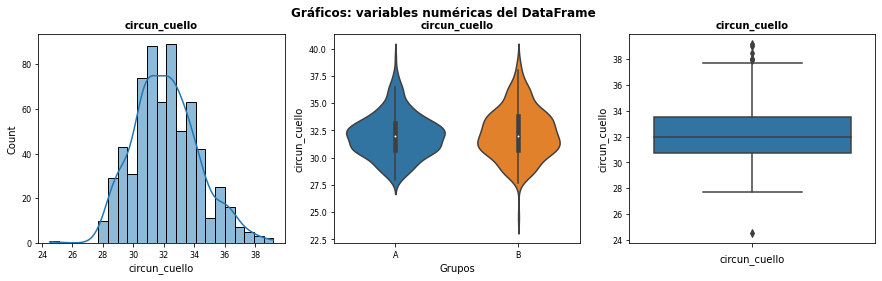

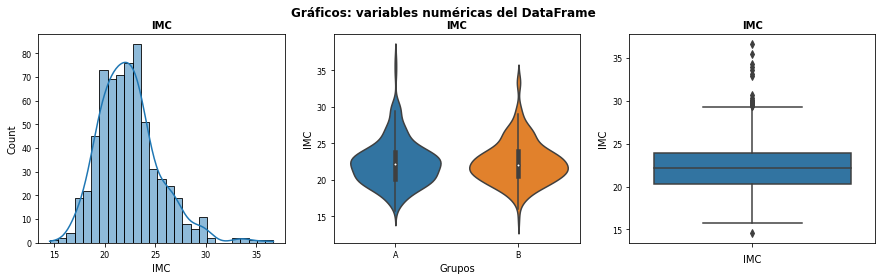

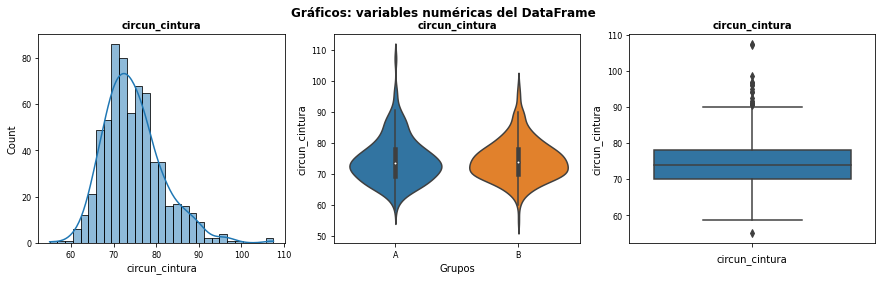

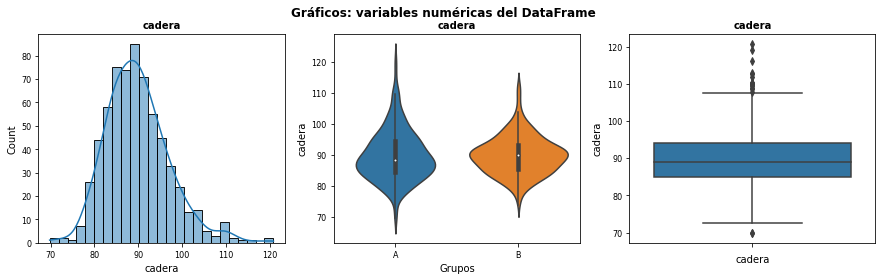

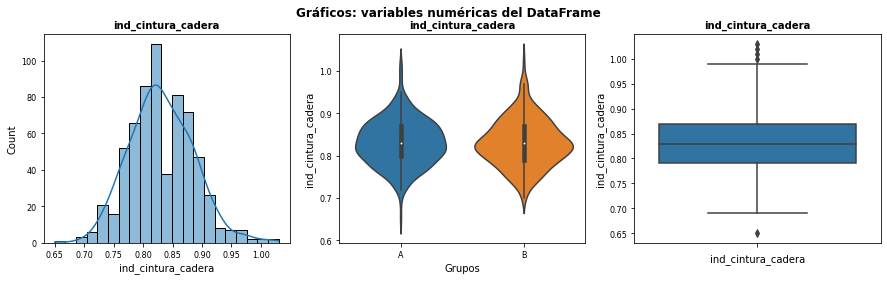

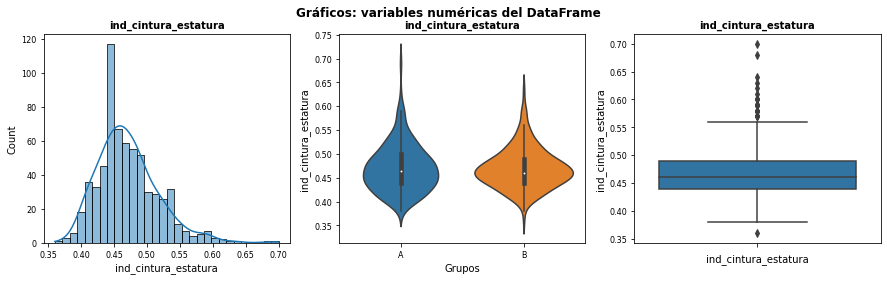

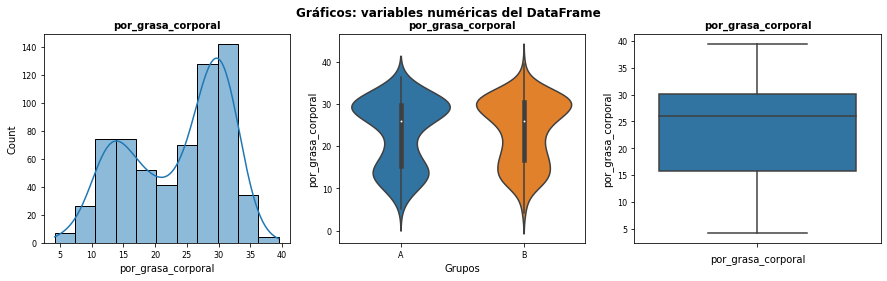

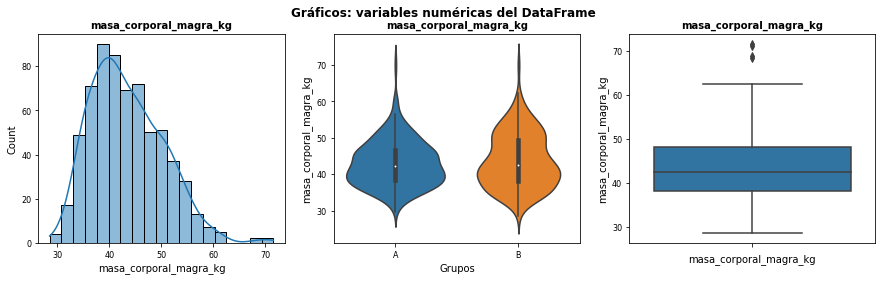

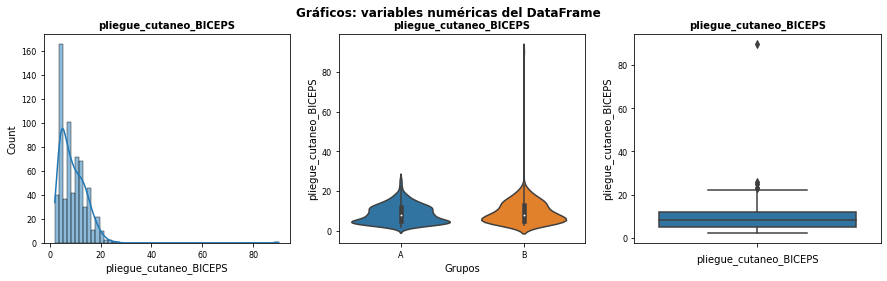

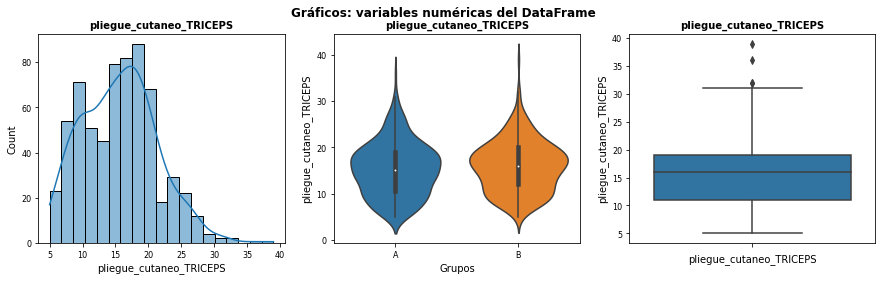

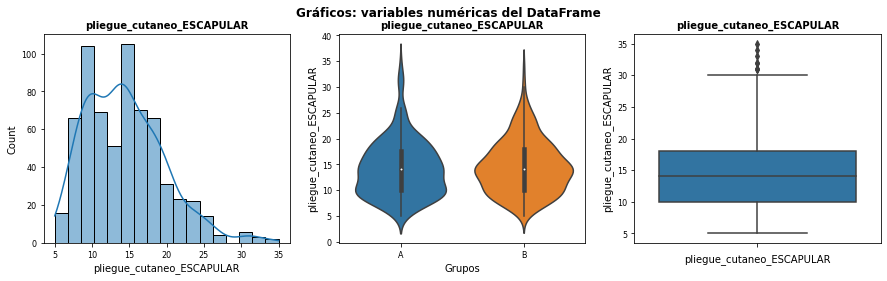

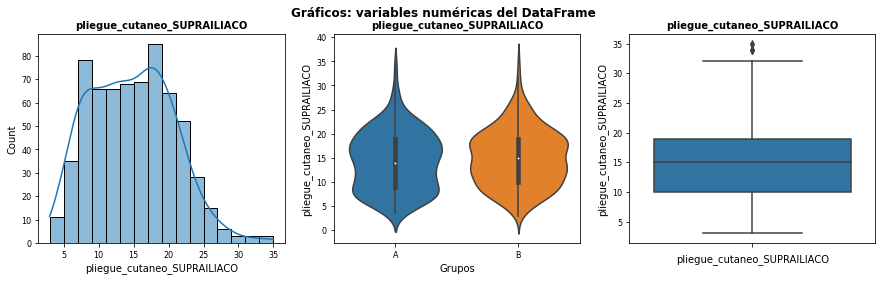

In [158]:
#Graficando las variables
import seaborn as sns
import matplotlib.pyplot as plt

for i, colum in enumerate(columnas_a_transformar): 
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.84))
    fig.suptitle('Gráficos: variables numéricas del DataFrame',fontweight = "bold")
    sns.histplot(x=colum, data=df, kde= True, ax=ax[0])
    ax[0].set_title(str(colum) , fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel(colum)
    
    sns.violinplot(x = 'Grupos', y = colum,  data  = df, ax=ax[1])
    ax[1].set_title(str(colum) , fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel('Grupos')
    
    sns.boxplot(y = colum,  data  = df, ax=ax[2])
    ax[2].set_title(str(colum) , fontsize = 10, fontweight = "bold")
    ax[2].tick_params(labelsize = 8)
    ax[2].set_xlabel(colum)

Como se puede apreciar, algunas variables tienen una distribución con forma normal y muchos de los casos se encuentran valores atípicos, por lo cual el tratamiento de los datos será analizando caso a caso.
#### Test de Normalidad
La manera en la cual se podrá saber qué método es mejor para imputar los datos, se utilizará un `Test de Normalidad` para las variables numéricas

**PLANTEAMIENTO DE LAS HIPÓTESIS**  

$H_o$: Los datos estan normalmente distribuidos  
$H_a$: Los datos **no** estan normalmente distribuidos

Nivel de significancia ( $\alpha$ )= 5% (0.05)

Como la cantidad de registros es mayor a 50, se utilizará el `kstest`

In [160]:
from scipy.stats import kstest  # n > 50
var_num = df.select_dtypes(exclude=['object']).columns
print("La cantidad de variables son "+ str(var_num.shape[0]))

La cantidad de variables son 15


In [163]:
from scipy.stats import kstest  # n > 50

for i in var_num:
    stat2, p2 = kstest(df[i], 'norm')
    print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2),i)

Estadisticos=1.000, p-value=0.000 talla
Estadisticos=0.998, p-value=0.000 edad
Estadisticos=1.000, p-value=0.000 peso_kg
Estadisticos=1.000, p-value=0.000 circun_cuello
Estadisticos=1.000, p-value=0.000 IMC
Estadisticos=1.000, p-value=0.000 circun_cintura
Estadisticos=1.000, p-value=0.000 cadera
Estadisticos=0.757, p-value=0.000 ind_cintura_cadera
Estadisticos=0.646, p-value=0.000 ind_cintura_estatura
Estadisticos=1.000, p-value=0.000 por_grasa_corporal
Estadisticos=1.000, p-value=0.000 masa_corporal_magra_kg
Estadisticos=0.994, p-value=0.000 pliegue_cutaneo_BICEPS
Estadisticos=1.000, p-value=0.000 pliegue_cutaneo_TRICEPS
Estadisticos=1.000, p-value=0.000 pliegue_cutaneo_ESCAPULAR
Estadisticos=0.999, p-value=0.000 pliegue_cutaneo_SUPRAILIACO


Como cada variable presenta un p_value menor que  𝛼=5
 %, entonces se rechaza  𝐻𝑜
  --> Los datos no distribuyen normal. 
  
  #### Correlación entre las variables

<Figure size 432x288 with 0 Axes>

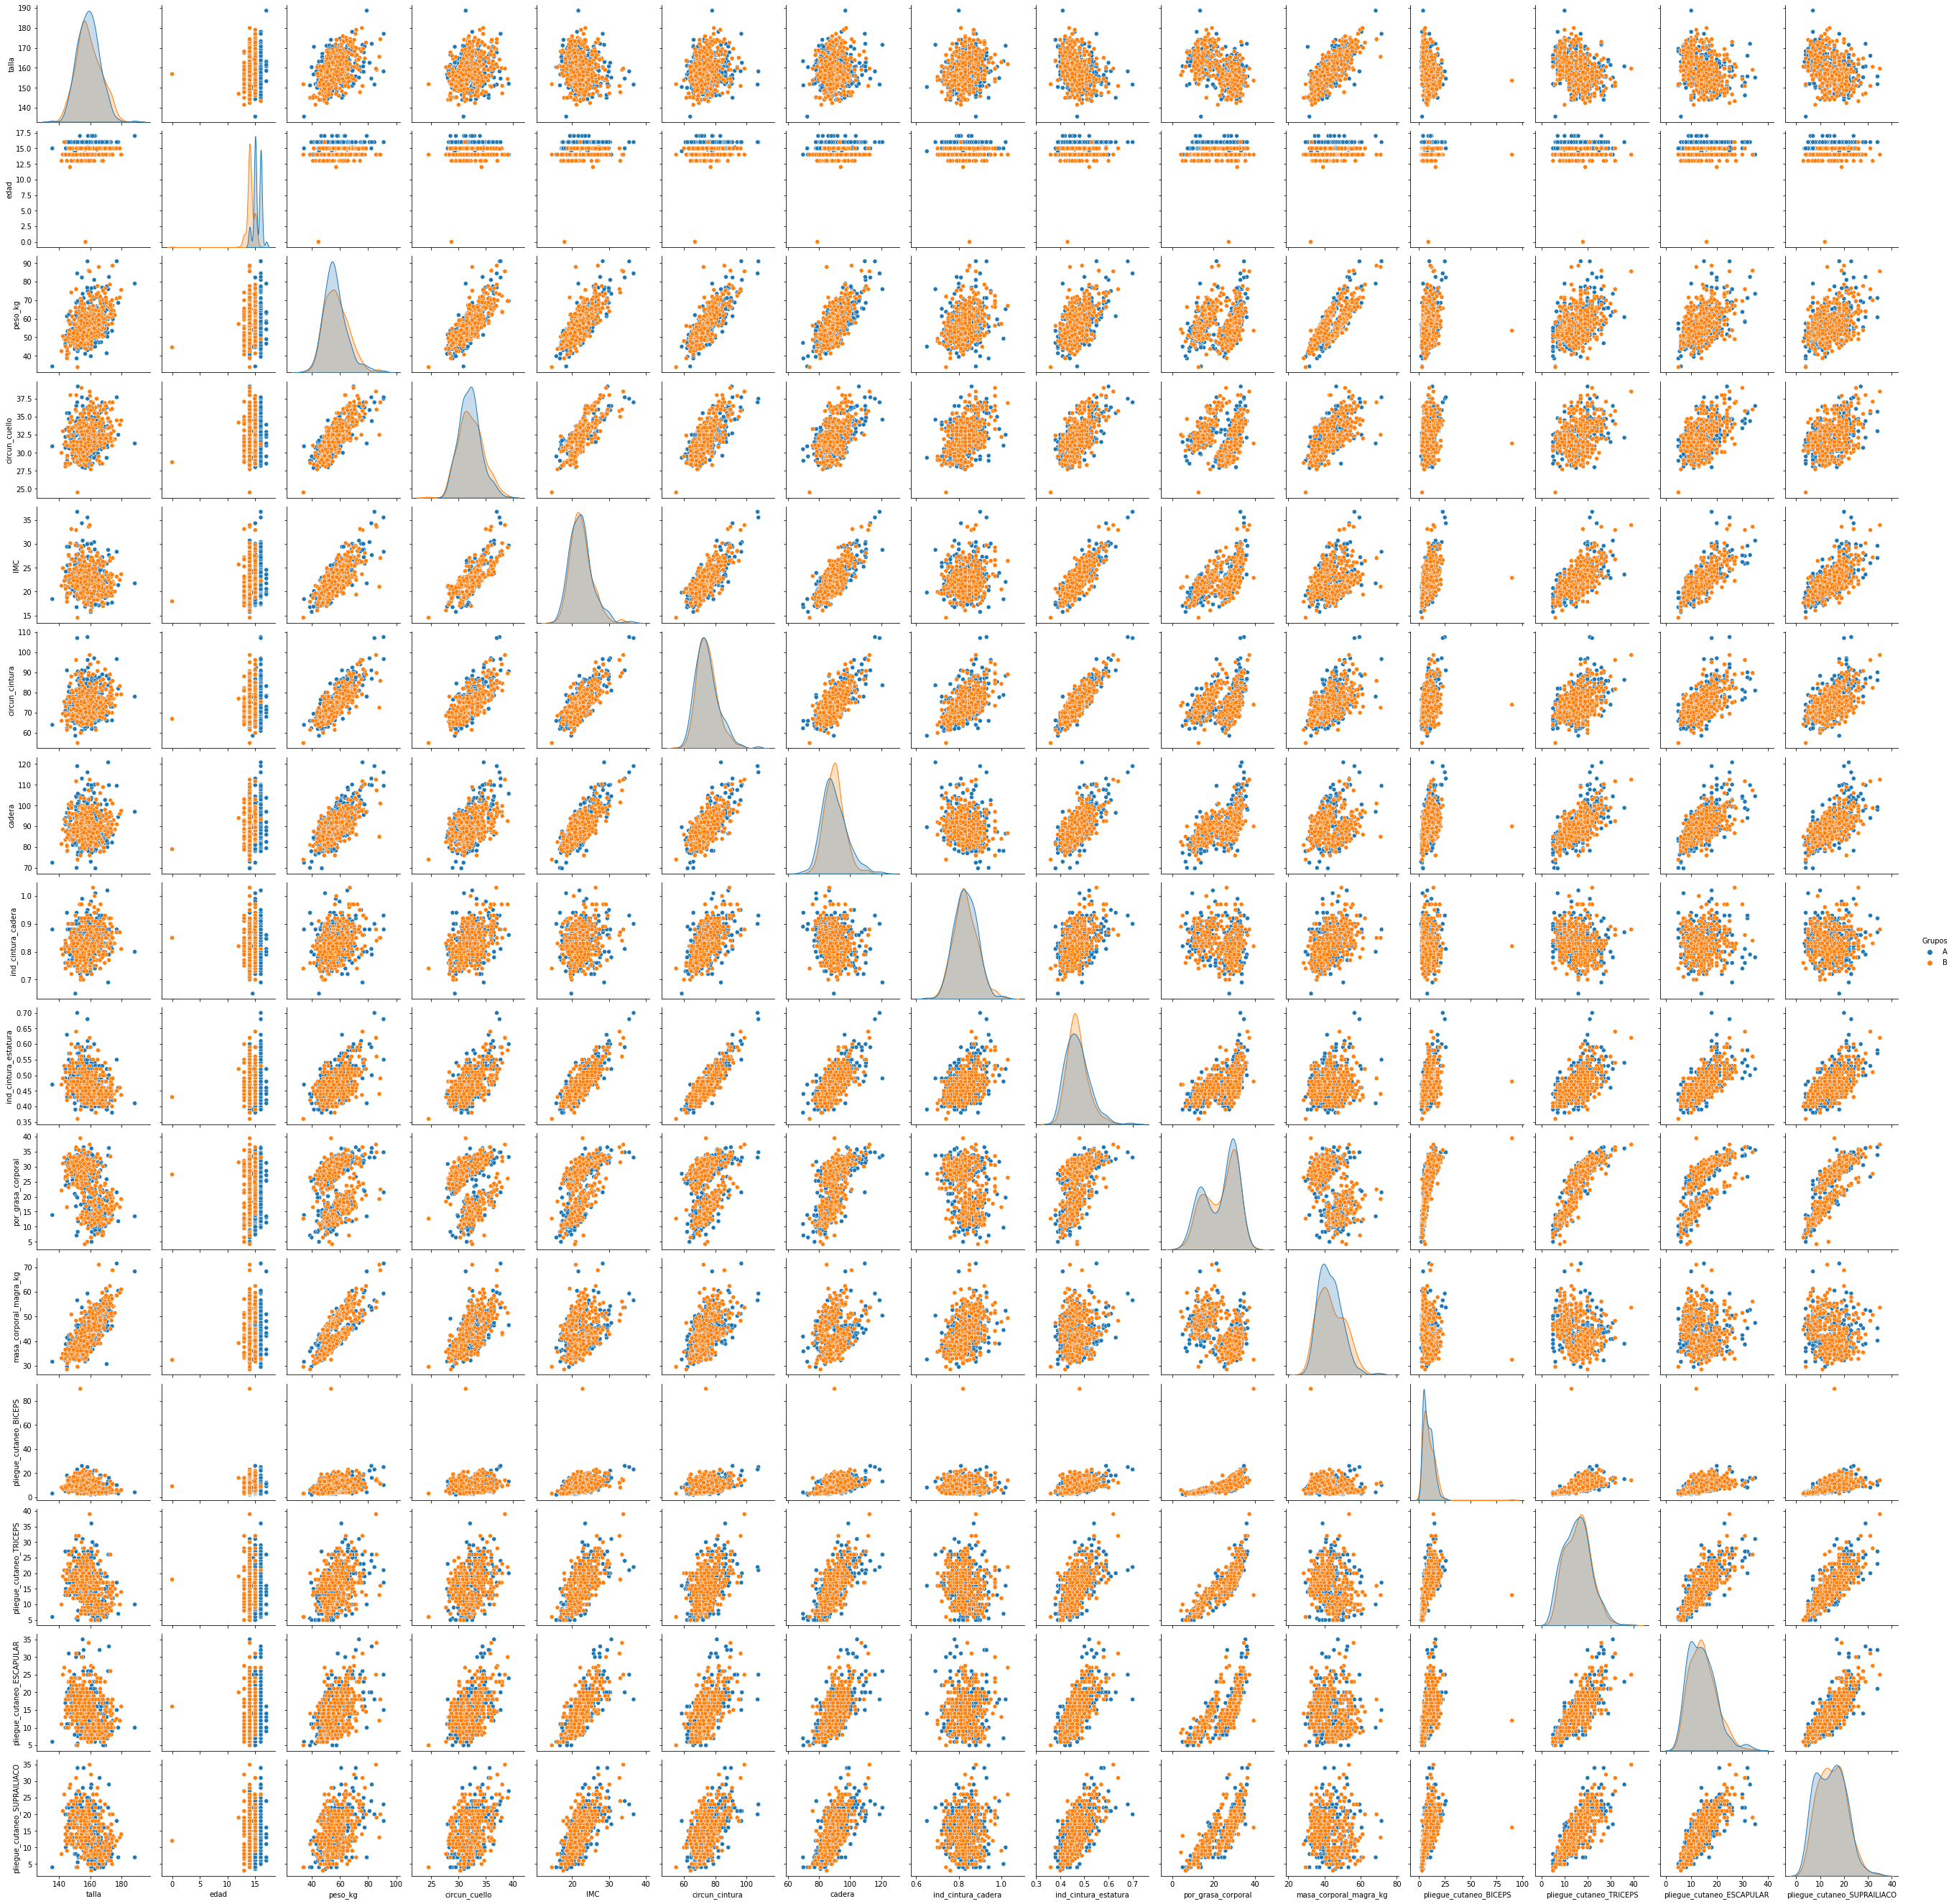

In [173]:
#plt.figure(figsize=(6,4))
#sns.pairplot(data[var_num], diag_kind='kde');

plt.figure(figsize=(6, 4))
sns.pairplot(
    df[columnas_a_transformar + ['Grupos']],  # Asegúrate de incluir la columna 'Grupos' en el DataFrame
    diag_kind='kde',
    hue='Grupos',  # Especifica la columna que define los grupos
    #palette={'A': 'red', 'B': 'blue'}  # Opcional: define colores específicos para los grupos
)

### Estadística Inferencial
#### Test Shapito-Wilk
Hipótesis nula
 $$H₀ : Los datos tienen distribución normal  $$  
Hipótesis alternativa
 $$H_1 : Los datos NO tienen distribución normal$$  

In [194]:
from scipy.stats import shapiro

for i in columnas_a_transformar:
    stat, p = shapiro(df[i])
    print('Estadisticos=%.5f, p-value=%.5f' % (stat, p),i)


Estadisticos=0.99338, p-value=0.00572 talla
Estadisticos=0.71539, p-value=0.00000 edad
Estadisticos=0.96446, p-value=0.00000 peso_kg
Estadisticos=0.98680, p-value=0.00001 circun_cuello
Estadisticos=0.95712, p-value=0.00000 IMC
Estadisticos=0.96242, p-value=0.00000 circun_cintura
Estadisticos=0.97248, p-value=0.00000 cadera
Estadisticos=0.99142, p-value=0.00078 ind_cintura_cadera
Estadisticos=0.95550, p-value=0.00000 ind_cintura_estatura
Estadisticos=0.92707, p-value=0.00000 por_grasa_corporal
Estadisticos=0.97033, p-value=0.00000 masa_corporal_magra_kg
Estadisticos=0.74710, p-value=0.00000 pliegue_cutaneo_BICEPS
Estadisticos=0.98168, p-value=0.00000 pliegue_cutaneo_TRICEPS
Estadisticos=0.95747, p-value=0.00000 pliegue_cutaneo_ESCAPULAR
Estadisticos=0.97952, p-value=0.00000 pliegue_cutaneo_SUPRAILIACO


Según el test de `Shapiro-Wilk`, la variable `talla` presenta una distribución normal con un $alpha$ igual al 5%

#### Comparación entre medias

Hipótesis Nula  
$$H₀ : \mu_1 = \mu_2$$

Hipótesis alternativa  
$$H₁ : \mu_1 \neq \mu_2$$



In [200]:
import pandas as pd
from scipy.stats import ttest_ind

for i in columnas_a_transformar:
    # Supongamos que tu DataFrame se llama 'df' y tiene las columnas 'talla' y 'grupo'
    # Filtrar las tallas por grupo
    grupoA_tallas = df[df['Grupos'] == 'A'][i]
    grupoB_tallas = df[df['Grupos'] == 'B'][i]

    # Realizar el t-test para comparar las medias
    stat, p = ttest_ind(grupoA_tallas, grupoB_tallas, equal_var=False)  # equal_var=False si las varianzas no son iguales

    print("")
    print('Estadisticos=%.5f, p-value=%.5f' % (stat, p),i)

    # Interpretación del valor p
    if p < 0.05:
        print("Existe una diferencia significativa entre " , i , " de los grupos.")
    else:
        print("No se encontró una diferencia significativa entre  " , i , "de los grupos.")


Estadisticos=-0.41752, p-value=0.67644 talla
No se encontró una diferencia significativa entre   talla de los grupos.

Estadisticos=19.32049, p-value=0.00000 edad
Existe una diferencia significativa entre  edad  de los grupos.

Estadisticos=-1.67782, p-value=0.09387 peso_kg
No se encontró una diferencia significativa entre   peso_kg de los grupos.

Estadisticos=-1.22720, p-value=0.22021 circun_cuello
No se encontró una diferencia significativa entre   circun_cuello de los grupos.

Estadisticos=-0.21549, p-value=0.82945 IMC
No se encontró una diferencia significativa entre   IMC de los grupos.

Estadisticos=-0.00724, p-value=0.99422 circun_cintura
No se encontró una diferencia significativa entre   circun_cintura de los grupos.

Estadisticos=-0.07723, p-value=0.93846 cadera
No se encontró una diferencia significativa entre   cadera de los grupos.

Estadisticos=0.10712, p-value=0.91473 ind_cintura_cadera
No se encontró una diferencia significativa entre   ind_cintura_cadera de los grupo

Con lo anterior, la `edad` entre los `Grupos` presentan una diferencia significativa. Lo mismo sucede con la variable de `pliegue_cutaneo_BICEPS`



Documento elaborado por Osvaldo Cubillos